In [1]:
import time
import numpy as np
from numpy import *
import matplotlib.pylab as plt
import operator
import pyscf
from pyscf import gto, scf, dft, tddft, data
import argparse

In [2]:
# parser = argparse.ArgumentParser(description='Davidson')

# parser.add_argument('-c', '--filename',       type=str, default='methanol.xyz', help='input filename')
# parser.add_argument('-m', '--method',         type=str, default='RKS', help='RHF RKS UHF UKS')
# parser.add_argument('-f', '--functional',     type=str, default='b3lyp', help='xc functional')
# parser.add_argument('-b', '--basis_set',      type=str, default='def2-SVP', help='basis sets')
# parser.add_argument('-i', '--initial_guess',  type=str, default='diag_A', help='initial_guess: diag_A or sTDA_A')
# parser.add_argument('-p', '--preconditioner', type=str, default='diag_A', help='preconditioner: diag_A or sTDA_A')
# parser.add_argument('-t', '--tolerance',      type=float, default='1e-5', help='residual norm convergence threshold')
# parser.add_argument('-n', '--nstates',        type=int, default='4', help='number of excited states')

# args = parser.parse_args()
# ################################################
# # read xyz file and delete its first two lines
# f = open(args.filename)
# coordinates = f.readlines()
# del coordinates[:2]
# ################################################

# print ('args.method =', args.method)
# ###########################################################################
# # build geometry in PySCF
# mol = gto.Mole()
# print (2)
# mol.build(atom = coordinates, basis = args.basis_set, symmetry = True)
# print (3)
# ###########################################################################

In [3]:
#np.set_printoptions (linewidth=300)

elements = ['H' , 'He', 'Li', 'Be', 'B' , 'C' , 'N' , 'O' , 'F' , 'Ne',
    'Na', 'Mg', 'Al', 'Si', 'P' , 'S' , 'Cl', 'Ar', 'K' , 'Ca',
    'Sc', 'Ti', 'V' , 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
    'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y' , 'Zr',
    'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn',
    'Sb', 'Te', 'I' , 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
    'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
    'Lu', 'Hf', 'Ta', 'W' , 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',
    'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th',
    'Pa', 'U' , 'Np', 'Pu'] 
hardness = [
0.47259288,
0.92203391,
0.17452888,
0.25700733,
0.33949086,
0.42195412,
0.50438193,
0.58691863,
0.66931351,
0.75191607,
0.17964105,
0.22157276,
0.26348578,
0.30539645,
0.34734014,
0.38924725,
0.43115670,
0.47308269,
0.17105469,
0.20276244,
0.21007322,
0.21739647,
0.22471039,
0.23201501,
0.23933969,
0.24665638,
0.25398255,
0.26128863,
0.26859476,
0.27592565,
0.30762999,
0.33931580,
0.37235985,
0.40273549,
0.43445776,
0.46611708,
0.15585079,
0.18649324,
0.19356210,
0.20063311,
0.20770522,
0.21477254,
0.22184614,
0.22891872,
0.23598621,
0.24305612,
0.25013018,
0.25719937,
0.28784780,
0.31848673,
0.34912431,
0.37976593,
0.41040808,
0.44105777,
0.05019332,
0.06762570,
0.08504445,
0.10247736,
0.11991105,
0.13732772,
0.15476297,
0.17218265,
0.18961288,
0.20704760,
0.22446752,
0.24189645,
0.25932503,
0.27676094,
0.29418231,
0.31159587,
0.32902274,
0.34592298,
0.36388048,
0.38130586,
0.39877476,
0.41614298,
0.43364510,
0.45104014,
0.46848986,
0.48584550,
0.12526730,
0.14268677,
0.16011615,
0.17755889,
0.19497557,
0.21240778,
0.07263525,
0.09422158,
0.09920295,
0.10418621,
0.14235633,
0.16394294,
0.18551941,
0.22370139]
#in Hartree
HARDNESS = dict(zip(elements,hardness))

In [4]:
mol = gto.Mole()
mol.build(atom = '\
C         -4.89126        3.29770        0.00029;\
O         -3.49307        3.28429       -0.00328;\
H         -5.28213        2.58374        0.75736;\
H         -5.28213        3.05494       -1.01161;\
H         -5.23998        4.31540        0.27138;\
H         -3.22959        2.35981       -0.24953',\
basis = 'def2-SVP')


In [5]:
# mol = gto.Mole()
# mol.build(atom = '\
# C         -3.15617        2.59898        0.79547;\
# C         -1.79169        2.11570        0.42917;\
# O         -0.80893        2.56621        0.99508;\
# H         -1.66947        1.36193       -0.34183;\
# H         -3.35300        2.38970        1.86780;\
# H         -3.91803        2.07820        0.17854;\
# H         -3.22824        3.69190        0.61449',\
# basis = 'def2-SVP')

In [6]:
# mol = gto.Mole()
# mol.build(atom = 'O         -4.89126        3.29770        0.00029;\
# H         -3.49307        3.28429       -0.00328;\
# H         -5.28213        2.58374        0.75736', basis = 'def2-SVP', symmetry = True)

In [7]:
# mol = gto.Mole()
# mol.build(atom = '\
# C         -1.44673        2.80824       -0.07813;\
# O         -1.78998        3.80792       -0.69188;\
# N         -1.18291        1.66325       -0.74926;\
# N         -1.33221        2.85136        1.26946;\
# H         -1.53168        3.72026        1.78651;\
# H         -1.04365        2.01512        1.79805;\
# H         -1.26824        1.62382       -1.77554;\
# H         -0.89270        0.81388       -0.24298'\
# , basis = 'def2-SVP', symmetry = True)

In [8]:
# mf = dft.RKS(mol) 
# mf.conv_tol = 1e-12
# mf.grids.level = 9     # 0-9, big number for large mesh grids, default is 3
# mf.xc = 'b3lyp'
# mf.kernel()  #single point energy

In [9]:
# mf = dft.RKS(mol) 
# mf.conv_tol = 1e-12
# mf.grids.level = 9     # 0-9, big number for large mesh grids, default is 3
# mf.xc = 'cam-b3lyp'
# mf.kernel()  #single point energy

#ORCA: FINAL SINGLE POINT ENERGY = -115.576160742154
#Turbomole: total energy      =    -115.57615989622

In [10]:
mf = scf.RHF(mol) 
mf.conv_tol = 1e-13
mf.kernel()  #single point energy

converged SCF energy = -114.950987102225


-114.95098710222453

In [11]:
# CIS = pyscf.tdscf.rhf.CIS(mf)
# CIS.nstates = 5
# CIS.kernel()

In [12]:
# td = tddft.TDA(mf)
# start = time.time()
# td.kernel()    #compute first few excited states.
# end = time.time()
# print ('Pyscf time =', round(end-start,4))

In [13]:
#mf.analyze()
##MO energies

In [14]:
#mf.mulliken_pop_meta_lowdin_ao()
#population analysis
#mf.mulliken_pop()

In [15]:
#check whether a is symmetric
def check_symmetric(a, tol=1e-12):
    return np.all(np.abs(a-a.T) < tol)

In [16]:
def matrix_power (S,a):
    s,ket = np.linalg.eigh(S)
    # S = mf.get_ovlp() #.get_ovlp() is basis overlap matrix
    # S = np.dot(np.linalg.inv(c.T), np.linalg.inv(c))
    # #s are eigenvalues, must be all positive
    # #each column of ket is a eigenket
    s = s**a
    X = np.linalg.multi_dot([ket,np.diag(s),ket.T])
    #X == S^1/2
    return X

def orthonormalize (C):
    X = matrix_power(mf.get_ovlp(), 0.5)
    C = np.dot(X,C)
    return C
# C is orthonormalized coefficient matrix
# np.dot(C.T,C) is a identity matrix

def coefficient_matrix ():
    C = mf.mo_coeff
    # mf.mo_coeff is the coefficient matrix
    C = orthonormalize (C)
    return C
# rthogonalized MO coefficients 
C = coefficient_matrix ()

In [17]:
# X = np.array([[[1, 2]], 
#               [[5, 6]],
#              [[7, 8]]])
# # X is composed of 3 matrix, each matrix is 1 by 2.

# A = np.array([[1, 2], [3, 4], [5, 6]])

In [18]:
# B = np.einsum('kij, li->klj', X, A) # mode-1 product
# print ('B.shape', np.shape(B))
# print (B)

In [19]:
# np.einsum('kij, lj->kil', X, A) # mode-2 product

In [20]:
# np.einsum('kij, lk->lij', X, A) # mode-3 product

In [21]:
total_begin = time.time()

In [22]:
Natm = mol.natm
MOe = mf.mo_energy  
#an array of MO energies, in Hartree

occupied = len(np.where(mf.mo_occ > 0)[0])
#mf.mo_occ is an array of occupance [2,2,2,2,2,0,0,0,0.....]
virtual = len(np.where(mf.mo_occ == 0)[0])

AO = [int(i.split(' ',1)[0]) for i in mol.ao_labels()] 
# .split(' ',1) is to split each element by space, split once.
# mol.ao_labels() it is Labels of AO basis functions, AO is a list of corresponding atom_id
# AO == [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
N_bf = len(AO)


a_x = 0.38
beta1= 1.86
beta2=0
alpha1= 0.9
alpha2=0
beta = beta1 + beta2 * a_x
alpha = alpha1 + alpha2 * a_x

#build gammaJ and gammaK matrix

#function to return chemical hardness from dictionary HARDNESS
def Hardness (atom_id):
    atom = mol.atom_pure_symbol(atom_id) 
    return HARDNESS[atom]
# mol.atom_pure_symbol(atom_id) returns pure element symbol, no special characters

def eta (atom_A_id, atom_B_id):
    eta = (Hardness(atom_A_id) + Hardness(atom_B_id))/2
    return eta

R = pyscf.gto.mole.inter_distance(mol, coords=None) 
#Inter-particle distance array
# unit == ’Bohr’, Its value is 5.29177210903(80)×10^(−11) m

GammaJ = np.zeros([Natm, Natm])
for i in range (0, Natm):
    for j in range (0, Natm):
        GammaJ[i,j] = (R[i, j]**beta + (a_x * eta(i, j))**(-beta))**(-1/beta)

GammaK = np.zeros([Natm, Natm])
for i in range (0, Natm):
    for j in range (0, Natm):
        GammaK[i,j] = (R[i, j]**alpha + eta(i, j)**(-alpha)) **(-1/alpha)

In [23]:
Natm = mol.natm 
def generateQ ():
    q = np.zeros([Natm, N_bf, N_bf])
    #N_bf is number Atomic orbitals, occupied+virtual, q is same size with C
    C = coefficient_matrix ()
    for atom_id in range (0, Natm):
        for i in range (0, N_bf):
            for p in range (0, N_bf):
                for mu in range (0, N_bf):
                    if AO[mu] == atom_id:
                        #collect all basis functions centered on atom_id
                        # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
                        q[atom_id,i,p] += C[mu,i]*C[mu,p]
                        #q[i,p] += 2*C[i,mu]*C[p,mu]
    return q



start = time.time()
q_tensors   = generateQ    ()
q_tensor_ij = q_tensors [:, :occupied,:occupied]
q_tensor_ab = q_tensors [:, occupied:,occupied:]
q_tensor_ia = q_tensors [:, :occupied,occupied:]
end = time.time()


In [24]:
# Natm = mol.natm 
# def generateQ_ij ():
#     q = np.zeros([Natm, occupied, occupied])
#     C = coefficient_matrix ()
#     for atom_id in range (0, Natm):
#         for i in range (0, occupied):
#             for p in range (0, occupied):
#                 for mu in range (0, N_bf):
#                     if AO[mu] == atom_id:
#                         #collect all basis functions centered on atom_id
#                         # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
#                         q[atom_id,i,p] += C[mu,i]*C[mu,p]
#                         #q[i,p] += 2*C[i,mu]*C[p,mu]
#     return q

# def generateQ_ab ():
#     q = np.zeros([Natm, virtual, virtual])
#     C = coefficient_matrix ()
#     for atom_id in range (0, Natm):
#         for i in range (0, virtual):
#             for p in range (0, virtual):
#                 for mu in range (0, N_bf):
#                     if AO[mu] == atom_id:
#                         #collect all basis functions centered on atom_id
#                         # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
#                         q[atom_id,i,p] += C[mu, occupied + i]*C[mu,occupied + p]
#                         #q[i,p] += 2*C[i,mu]*C[p,mu]
#     return q

# def generateQ_ia ():
#     q = np.zeros([Natm, occupied, virtual])
#     C = coefficient_matrix ()
#     for atom_id in range (0, Natm):
#         for i in range (0, occupied):
#             for p in range (0, virtual):
#                 for mu in range (0, N_bf):
#                     if AO[mu] == atom_id:
#                         #collect all basis functions centered on atom_id
#                         # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
#                         q[atom_id,i,p] += C[mu,i]*C[mu, occupied + p]
#                         #q[i,p] += 2*C[i,mu]*C[p,mu]
#     return q

# start = time.time()
# q_tensor_ij = generateQ_ij ()
# q_tensor_ab = generateQ_ab ()
# q_tensor_ia = generateQ_ia ()

# end = time.time()
# print (end - start)

In [71]:
Q_K = np.einsum('Aia, Bjb, AB -> iajb', q_tensor_ia, q_tensor_ia, GammaK)
Q_J = np.einsum('Aij, Bab, AB -> ijab', q_tensor_ij, q_tensor_ab, GammaJ)

def iajb_fly (v):
    iajb_v = np.einsum('iajb, mjb -> mia', Q_K, v)
    return iajb_v

def ijab_fly (v):
    ijab_v = np.einsum('ijab, mjb -> mia', Q_J, v)
    return ijab_v

delta_diag_A = np.zeros((occupied, virtual))
for i in range (0, occupied):
    for a in range (0, virtual):
        delta_diag_A[i,a] = (MOe[occupied+a] - MOe[i])
        
# delta_ij = np.eye(occupied,occupied)
# delta_ab = np.eye(virtual,virtual)

def delta_fly (v):
    #delta_v = np.einsum('ij,ab,ia,jb -> ia',delta_ij,delta_ab,delta_diag_A, v)
    delta_v = delta_diag_A*v
    return delta_v

def sTDA_fly (v):
    v = np.reshape (v, (-1, occupied, virtual)) 
    # -1 means shape of first dimension is not asigned, but can be inferred with the rest dimension
    sTDA_v =  delta_fly (v) + 2*iajb_fly (v) - ijab_fly (v) 
    #off-diagonal elements are corrrect!!
    sTDA_v = np.reshape (sTDA_v, (occupied*virtual, -1))
#     print (np.shape(sTDA_v))
    return sTDA_v

[12.2388045  13.59944497 13.79151538 15.04073066]
total building sTDA A time = 1515.71


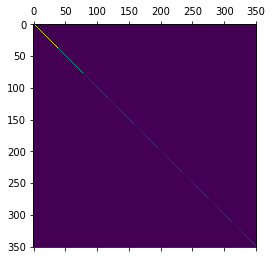

In [72]:
n = occupied * virtual
I = np.eye(n)


sTDA_A = sTDA_fly (I)
    
total_end = time.time()  
    
s,k = np.linalg.eigh(sTDA_A)
print (s[:4]*27.21138624598853)
# [12.2388045  13.59944497 13.79151538 15.04073066]
print ('total building sTDA A time =', round(total_end - total_begin,2))
plt.matshow(sTDA_A)
plt.show()


# D = np.eye(n,n)
# for i in range(0,n):
#     D[:,i] = sTDA_fly (D[:,i])
# plt.matshow(D)
# plt.show()

In [326]:
###########################################################################################
def preconditioner_sTDA (B, eigen_lambda, Y=0): 
    # (sTDA_A - eigen_lambda*I)^-1 B
    #B is the vector to be preconditioned, 
    
    start = time.time()
    tol = 1e-5      # Convergence tolerance
    max = 90      # Maximum number of iterations  
    n = occupied*virtual 
    #size of sTDA_A matrix
   
    d = delta_diag_A.flatten() - eigen_lambda
    # d is (\spsilon_a-\spsilon_i)
    #preconditioner
    d[(d<1e-16)&(d>=0)] = 1e-16
    d[(d>-1e-16)&(d<0)] = -1e-16   
    #kick out small values

    
    ###########################################
    #initial guess: (diag(A) - lambda)^-1 B.
    V = np.asarray(B / d).reshape(n,1)
    # np.shape(V) = (351,1)
    
    W = sTDA_fly(V)
    #V is guess holder, 
    # at the end of each iteration, V will be appended with a new guess vector
    ####################################################################################
    
    # Begin iterations
    for i in range (0, max):
        print ('Iteration =', i)
        sub_B = np.dot(V.T, B) 
        sub_A = np.dot(V.T, W)
        #project sTDA_A matrix and vector B into subspace
        
        m = np.shape(sub_A)[0]
        #m is always the size of subspace
        print ('Size of subspace =', m)
        # size of subspace
        sub_guess = np.linalg.solve(sub_A - eigen_lambda * np.eye(m,m), sub_B)
        full_guess = np.dot(V, sub_guess)
        residual = (sTDA_fly(full_guess) - eigen_lambda * full_guess) - B

        norm = np.linalg.norm (residual)
        if norm < tol:
            break
       
        print ('Norm of residual =', norm)
        guess = residual[:,0]/d 
        #precondition step
        
        
        ##########################################
        #Gram-Schdmit, orthonormalize:
        #normlaize the vector before (and after) GS
        guess = guess/np.linalg.norm(guess)
        print ('shape of V =', np.shape(V))
        
        for j in range (0, m):  
            guess = guess - np.dot(V[:,j], guess) * V[:,j] 
        
        guess = guess/np.linalg.norm(guess)
        ##########################################
        
        guess = np.asarray(guess).reshape((n,1))
        
        print ('shape of guess =', np.shape(guess))
        
        V = np.append(V, guess, axis=1)
        W = np.append(W, sTDA_fly(guess), axis=1)
        # add new guess to the guess space
    ####################################################################################      

    #########################################################################################
    print ('Iteration steps =', i+1)
    end = time.time()
    print ('Precondition time:', round(end-start,4))
   
    return (full_guess)
###########################################################################################

In [327]:
B = np.arange(0, occupied*virtual)
a = None
b = None

preconditioned_B =  preconditioner_sTDA (B, 12.2388045, b)

true_answer = np.dot(np.linalg.inv(sTDA_A - 12.2388045*np.eye(np.shape(sTDA_A)[0])), B)

print (preconditioned_B)
print (np.round(true_answer - preconditioned_B))

initila V.shape() = (351,)
initila V.shape() = (351, 1)
Iteration = 0
Size of subspace = 1
Norm of residual = 73745.24672820895
shape of V = (351, 1)
shape of guess = (351, 1)
Iteration = 1
Size of subspace = 2
Norm of residual = 73745.24672820895
shape of V = (351, 2)
shape of guess = (351, 1)
Iteration = 2
Size of subspace = 3
Norm of residual = 73583.82688535916
shape of V = (351, 3)
shape of guess = (351, 1)
Iteration = 3
Size of subspace = 4
Norm of residual = 118622.67866781392
shape of V = (351, 4)
shape of guess = (351, 1)
Iteration = 4
Size of subspace = 5
Norm of residual = 150659.9496670507
shape of V = (351, 5)
shape of guess = (351, 1)
Iteration = 5
Size of subspace = 6
Norm of residual = 2527638.4376967093
shape of V = (351, 6)
shape of guess = (351, 1)
Iteration = 6
Size of subspace = 7
Norm of residual = 427419.1954816936
shape of V = (351, 7)
shape of guess = (351, 1)
Iteration = 7
Size of subspace = 8
Norm of residual = 554409.3193324278
shape of V = (351, 8)
shape of

shape of guess = (351, 1)
Iteration = 73
Size of subspace = 74
Norm of residual = 379619.0606461282
shape of V = (351, 74)
shape of guess = (351, 1)
Iteration = 74
Size of subspace = 75
Norm of residual = 379572.6866165558
shape of V = (351, 75)
shape of guess = (351, 1)
Iteration = 75
Size of subspace = 76
Norm of residual = 379710.3729530216
shape of V = (351, 76)
shape of guess = (351, 1)
Iteration = 76
Size of subspace = 77
Norm of residual = 379470.1690232128
shape of V = (351, 77)
shape of guess = (351, 1)
Iteration = 77
Size of subspace = 78
Norm of residual = 379473.90983628953
shape of V = (351, 78)
shape of guess = (351, 1)
Iteration = 78
Size of subspace = 79
Norm of residual = 379395.21256802895
shape of V = (351, 79)
shape of guess = (351, 1)
Iteration = 79
Size of subspace = 80
Norm of residual = 379420.3988590692
shape of V = (351, 80)
shape of guess = (351, 1)
Iteration = 80
Size of subspace = 81
Norm of residual = 379280.0384366635
shape of V = (351, 81)
shape of guess

In [306]:
td = tddft.TDA(mf)
vind, hdiag = td.gen_vind(mf)
print (type(hdiag))
print (np.shape(hdiag))

<class 'numpy.ndarray'>
(351,)


In [ ]:
######################################################################################
def A_diag_initial_guess (k):
    m = 2*k  
    # m is size of subspace Hamiltonian, amount of initial guesses   
    # m=k works for H2, m=4k works for H2O
    V = np.zeros((n, m)) 
    #array of zeros, a container to hold current guess vectors 
    W = np.zeros((n, m)) 
    
    sort = hdiag.argsort()
    for j in range(0,m):
        V[int(np.argwhere(sort == j)), j] = 1   
        # positions with lowest values set as 1
        W[:, j] = vind(V[:, j])
    # W = Av, create transformed guess vectors

    return (m, V, W)

def sTDA_initial_guess (k):
    m = 2*k  
    # m is size of subspace Hamiltonian, amount of initial guesses   
    # m=k works for H2, m=4k works for H2O
    V = np.zeros((n, m)) 
    # array of zeros, a container to hold current guess vectors, v
    W = np.zeros((n, m)) 
    # a container to hold transformed guess vectors, Av
    eigvalues, eigkets = np.linalg.eigh(sTDA_A)
    # eigv, eigk = Davidson (A, m, 1e-5, default_initial_guess, A_diag_preconditioner)
    #!!!!!!!! diagonalize sTDA_A amtrix
    for j in range(0,m):
        V[:, j] = eigkets [:, j]
        W[:, j] = vind(V[:, j])
        
    return (m, V, W)
######################################################################################



###################################################################
def A_diag_preconditioner (residual, sub_eigenvalue, x):
    d = hdiag - sub_eigenvalue[x]
    d[(d<1e-16)&(d>=0)] = 1e-16
    d[(d>-1e-16)&(d<0)] = -1e-16   
    #kick out all small values
    
    new_vec = residual/d
    return new_vec

def sTDA_preconditioner (residual, sub_eigenvalue, x):
    new_vec = np.dot(np.linalg.inv(sTDA_A - sub_eigenvalue[x]*I),residual)
    return new_vec
####################################################################






################################################################################
def Davidson (k, tol, initial_guess, preconditioner):

    if initial_guess == 'sTDA_initial_guess':
        initial_guess = sTDA_initial_guess
        print ('Initial guess: sTDA A matrix')
    elif initial_guess == 'A_diag_initial_guess':
        initial_guess = A_diag_initial_guess
        print ('Initial guess: Diagonal of full A matrix')
        
    if preconditioner == 'sTDA_preconditioner':
        preconditioner = preconditioner_sTDA
        print ('Preconditioner: sTDA A matrix')
    elif preconditioner == 'A_diag_preconditioner':
        preconditioner = A_diag_preconditioner
        print ('Preconditioner: Diagonal of full A matrix')
    start = time.time()
    
    #tol = 1e-5      
    # Convergence tolerance
    
    max = 90      
    # Maximum number of iterations

    ########################################################################################### 
    for i in range(0, max):
        
        sum_convec = 0
        # total converged eigenvectors
        # breaf if sum_convec == k
        
        #################################################
        # generate initial guess
        if i == 0:
            m, V, W = initial_guess(k)
        #################################################

        sub_A = np.dot(V.T, W)  
        # sub_A is subspace A matrix
        sub_eigenvalue, sub_eigenket = np.linalg.eigh(sub_A) 
        # Diagonalize the subspace Hamiltonian, and sorted.

        lasit_newvec = 0
        # amount of new vectors added in last iteration, ranging from 1 to k
        # because not all new guess_vectors can survive the Gram-Schmidt

        ####################################################################################
        for x in range(0,k):      
            #looking at first k vecrors one by one, check whether they are roots
            residual = np.dot((W[:,:m]- sub_eigenvalue[x]*V[:,:m]), sub_eigenket[:,x])
            # np.dotV([:,:m])s[:,x]) can project the subspace-eigenket back to full space 

            norm = np.linalg.norm(residual)
            if norm <= tol:
                sum_convec += 1
            else:
                # current guess is not good enough, 
                # so we use current guess to create new guess vectors
                #########################################################
                new_vec = preconditioner (residual, sub_eigenvalue, x)          
                #########################################################
                # preconditioner
                
                new_vec = new_vec/np.linalg.norm (new_vec) 
                # normalize before Gram-Schmidt 
                for y in range (0, m + lasit_newvec):  
                    # orthornormalize the new vector against all old vectors
                    new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y]   

                norm = np.linalg.norm (new_vec)
                if norm > 1e-16:
                    new_vec = new_vec/norm
                    # normalzie the new vector, now Gram-Schmidt is done

                    V = np.append (V, new_vec[:, None], axis=1)
                    # put the new guess into container
                    
                    trans_new_vec = vind(new_vec)
                    # print ('Shape of trans_new_vec =', np.shape(trans_new_vec))
                    W = np.append (W, trans_new_vec.T, axis = 1)
                    # put transformed guess Av into container
                    lasit_newvec += 1
        ####################################################################################      
        if sum_convec == k:
            break
        m += lasit_newvec
    ########################################################################################### 

    Eigenkets = np.dot(V[:,:m], sub_eigenket[:, :k])

    end = time.time()
    print ('Iteration steps =', i+1)
    print ('Davidson time:', round(end-start,4))
    
    return (sub_eigenvalue[:k]*27.21138624598853, Eigenkets[:,:k])



print ('#################################################################')
print ('In-house Davdison codes:')

k = 4
tol = 1e-5
initial_guess = 'sTDA_initial_guess'
preconditioner = 'sTDA_preconditioner'

print ('Number of excited states =', k)
print ('Residual convergenve threshold =', tol)

Excitation_energies, kets = Davidson (k, tol, initial_guess, preconditioner)

print ('Excited State energies (eV) =')
print (Excitation_energies)
# print ('#################################################################')
# print ('PySCF TDA-TDDFT codes:')
# td.nstates = k
# td.kernel()
# print ('#################################################################')

In [ ]:
def generateQ (atom_id):
    q = np.zeros([N_bf, N_bf])
    #N_bf is number Atomic orbitals, q is same size with C
    
    C = coefficient_matrix ()
    for i in range (0, N_bf):
        for p in range (0, N_bf):
            for mu in range (0, N_bf):
                if AO[mu] == atom_id:
                    #collect all basis functions centered on atom_id
                    # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
                    q[i,p] += C[mu,i]*C[mu,p]
                    #q[i,p] += 2*C[i,mu]*C[p,mu]
    return q

# home_made population analysis
# for atom_id in range (0, Natm):
#     print (check_symmetric(Qmatrix[atom_id], tol=1e-12))
#     m = 0
#     for i in range (0, occupied):
#         m += Qmatrix[atom_id][i,i]
#         #sum over occupied orbitals
#     print (m)


In [ ]:
start = time.time()
Qmatrix = [(generateQ(atom_id)) for atom_id in range (0, Natm)]
#a list of q matrix
end = time.time()

Qmatrix = np.asarray(Qmatrix)
print (end - start)
print (np.shape(Qmatrix))

In [ ]:
#define two electron intergeral (pq|rs)
Natm = mol.natm 
#number of atoms
Natm = mol.natm 

def ele_intJ (i,j,a,b):
    ijab = 0
    for atom_A_id in range (0, Natm):
        for atom_B_id in range (0, Natm):
            ijab += Qmatrix[atom_A_id,i,j] * Qmatrix[atom_B_id,a,b] * GammaJ[atom_A_id, atom_B_id]
    return ijab
        
def ele_intK (i,a,j,b):
    iajb = 0
    for atom_A_id in range (0, Natm):
        for atom_B_id in range (0, Natm):
            iajb += Qmatrix[atom_A_id,i,a] * Qmatrix[atom_B_id,j,b] * GammaK[atom_A_id, atom_B_id]
    return iajb

In [ ]:
#build A matrix
def build_sTDA_A ():
    A = np.zeros ([occupied*virtual, occupied*virtual])
    m = -1
    for i in range (0, occupied):
        for a in range (occupied, N_bf):
            m += 1 #for each ia pair, it corresponds to a certain row
            n = -1
            for j in range (0, occupied):
                for b in range (occupied, N_bf):
                    n += 1 #for each jb pair, it corresponds to a certain column        
                    if i==j and a==b:
                        A[m,n] =   2*ele_intK(i,a,j,b) - ele_intJ(i,j,a,b) + (MOe[a]-MOe[i]) 
                    else:
                        A[m,n] = 2*ele_intK(i,a,j,b) - ele_intJ(i,j,a,b)
    print ('sTDA_A matrix built, size =', np.shape(A)[0])
    return A

start = time.time()
sTDA_A = build_sTDA_A ()
end = time.time()
print ('A_sTDA building time =', round (end - start, 2))

In [ ]:
plt.matshow(sTDA_A)
plt.show()

In [ ]:
eigv,eigk = np.linalg.eigh(sTDA_A)
print (eigv[:5]*27.21138624598853)

In [ ]:
# print (check_symmetric(A, tol=1e-8))

In [ ]:
# plt.matshow(A)
# plt.show()

In [ ]:
# eigv,eigk = np.linalg.eigh(A)
# idx = eigv.argsort()
# eigv = eigv[idx]    #eigenvalues
# eigk = eigk[:,idx]          #eigenkets, m*m

# #np.linalg.eigh guarantees you that the eigenvalues are sorted and uses a faster algorithm 
# #that takes advantage of the fact that the matrix is symmetric. 

# print (np.round (eigv[:10]*27.21138624598853,4))   
# # ':n', first n elements; 'n:' all elements except firt n 


#methanol
# a_x = 0.38
# beta1= 1.86
# beta2=0
# alpha1= 0.9
# alpha2=0
#[12.2388 13.5994 13.7915 15.0407 15.1073 15.245  16.4534 16.5181 16.8506 17.3015]

In [ ]:
td = tddft.TDA(mf)
# td.nstates = 5
# td.conv_tol = 1e-13
# td.kernel()

In [ ]:
# energies, vectors = np.linalg.eigh(H)
# print (energies[:5]*27.21138624598853)

In [ ]:
sTDA_A = build_sTDA_A()
## prepare sTDA_A matrix
vind, hdiag = td.gen_vind(mf)
n = len(hdiag)
I = np.eye(n)

In [ ]:
# H2O Excited State energies (eV)
# [ 5.12051837  7.78183026  8.43305887  9.81364248 10.41186311]
# [ 5.12051842  7.78183032  8.43305894  9.81364256 10.4118632 ]
#


#CH3OH Excited State energies (eV)
#[ 8.73907144 10.77713239 11.26755041 12.203639   12.27658757]
#[ 8.73907152 10.77713248 11.2675505  12.2036391  12.27658768]



# CH3OH
# (351, 351)
# sTDA_A matrix built
# sTDA A matrix as initial guess
# sTDA A matrix as preconditioner
# Iteration steps = 11
# Davidson time: 0.3732
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]

# (351, 351)
# sTDA_A matrix built
# sTDA A matrix as initial guess
# Diagonal of full A matrix as preconditioner
# Iteration steps = 15
# Davidson time: 0.3009
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]


# (351, 351)
# sTDA_A matrix built
# Diagonal of full A matrix as initial guess
# Diagonal of full A matrix as preconditioner
# Iteration steps = 15
# Davidson time: 0.3152
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]


# (351, 351)
# sTDA_A matrix built
# Diagonal of full A matrix as initial guess
# sTDA A matrix as preconditioner
# Iteration steps = 11
# Davidson time: 0.334
# Excitation_energies =
# [ 8.73907152 10.77713248 11.2675505  12.2036391 ]

In [ ]:
# def davidson_A_matrix_hstack (A, k): # matrix A and how many eignvalues to solve
    
#     start = time.time()

#     tol = 1e-5      # Convergence tolerance
#     max = 40      # Maximum number of iterations

#     ###########################################################################################
#     # Begin iterations
#     for i in range(0, max):
#         sum_convec = 0
#         #total converged eigenvectors
#         # if sum_convec == k, break
        
#         lasit_newvec = 0
#         # it records amount of new vectors added in last iteration, ranging from 1 to k
#         # because not all new guess_vectors can survive the Gram-Schmidt
        

#         #################################################
#         # generate initial guess
#         if i == 0:
#             #initial guess  
#             n = np.shape(A)[0]
#             m = k  
#             # m is size of subspace Hamiltonian, amount of initial guesses   
#             # m=k works for H2, m=4k works for H2O

#             V = np.zeros((n, m)) #array of zeros, a container to hold current guess vectors
            
#             sort = np.diag(A).argsort()
#             for j in range(0,m):
#                 V[int(np.argwhere(sort == j)), j] = 1   
#                 # positions with lowest values set as 1
#             W = np.dot(A,V)   
#             # W = Av, create transformed guess vectors
#         #################################################
        
        
#         sub_A = np.dot(V.T, W)  
#         # sub_A is subspace A matrix
#         sub_eigenvalue, sub_eigenket = np.linalg.eigh(sub_A) 
#         # Diagonalize the subspace Hamiltonian, and sorted.
        
        
#         ####################################################################################
#         for x in range(0,k):      
#             #looking at first k vecrors one by one, check if they are roots
#             residual = np.dot((W[:,:m]- sub_eiegnvalue[x]*V[:,:m]), sub_eigenket[:,x])
#             # np.dotV([:,:m])s[:,x]) can transform the subspace-eigenket back into full space eigenket
            
#             norm = np.linalg.norm(residual)
#             if norm <= tol:
#                 sum_convec += 1
#             else:
#                 #print ('norm > tol')
#                 # current guess is not good enough, 
#                 # so we use current guess to create new guess vectors
#                 d = np.diag(A)-sub_eiegnvalue[x]
#                 d[(d<1e-16)&(d>=0)] = 1e-16
#                 d[(d>-1e-16)&(d<0)] = -1e-16   
#                 # kick out all small values
#                 new_vec = residual/d          
#                 # preconditioner
                
#                 new_vec = new_vec/np.linalg.norm (new_vec) 
#                 # normalize before Gram-Schmidt 

#                 for y in range (0, m + lasit_newvec):  
#                     # orthornormalize the new vector against all old vectors
#                     new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y]   
                    
#                 norm = np.linalg.norm (new_vec)
#                 if norm > 1e-16:
#                     new_vec = new_vec/norm
#                     # normalzie the new vector, now Gram-Schmidt is done
                    
#                     V = np.append (V, new_vec[:, None], axis=1)
#                     # put the new guess into container
                    
#                     W = np.append (W, np.dot(A, new_vec)[:, None], axis = 1)
#                     # put transformed guess Av into container
                    
#                     lasit_newvec += 1
#         ####################################################################################      
#         if sum_convec == k:
#             break
#         m += lasit_newvec
#     ########################################################################################### 
#     print ('Iteration steps =', i+1)

#     end = time.time()
#     Eigenkets = np.dot(V[:,:m], sub_eigenket[:, :k])
#     print ('Davidson time (no vind function):', round(end-start,4))
#     # return (sub_eiegnvalue[:k], Eigenkets[:,:k])
#     return (sub_eiegnvalue[:k]*27.21138624598853)

# #print (davidson_A_matrix_hstack (A, 5))

In [ ]:
# a = 1000 #dimension of H
# b = 3
# sparsity = 0.01
# H = np.zeros((a,a))
# for i in range(0,a):
#     H[i,i] = i + 1
# H = H + sparsity*np.random.randn(a,a)
# H = (H.T + H)/2   # A is a random Hermition

# E,vec = np.linalg.eig(H)
# idx = E.argsort()
# e = E[idx]
# print (' numpy   =', e[:10])  
# # Standard eigenvalues


# print (davidson_A_matrix (H, 10))

In [ ]:
#function to return distance between two atoms
# def distance (atom_A_id, atom_B_id):
# #   distance = R [atom_A_id, atom_B_id]
#     a = mol.atom_coord(atom_A_id) #coordinates of atom A
#     b = mol.atom_coord(atom_B_id) #coordinates of atom B
#     distance = np.linalg.norm (a - b)
#     return distance
# #(mol.atom_coord(atom_id)) is to return the coordinates of a certain atom, it is a ndarray


#array for the coordinates (in Bohr) of each atom 1 Bohr = 0.529177 Angstrom
#print (mol.unit)

In [ ]:
#nocc = mol.nelectron 
# mol.nelectron is number of electrons